# Project: Wrangling and Analyze Data

Student: Mehrol Bazarov

Udacity 4th project

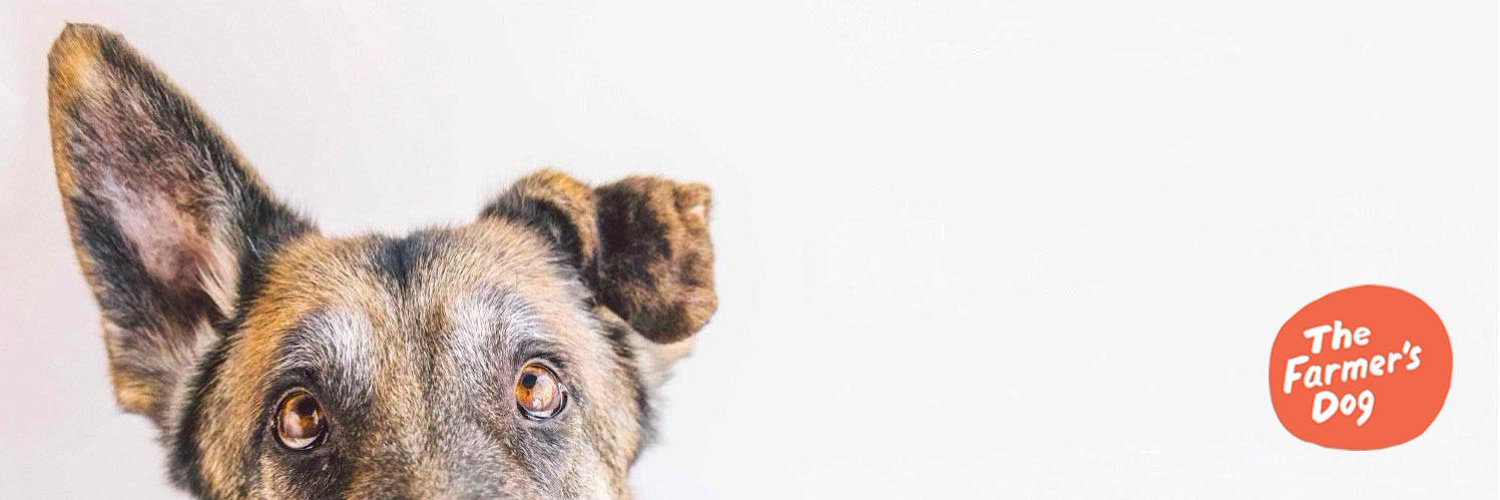

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## Table of Contents

1. [Data Gathering](#data-gathering)
2. [Assessing Data](#assessing-data)
3. [Cleaning Data](#cleaning-data)
4. [Storing Data](#storing-data)
5. [Analyzing and Visualizing Data](#analyzing-and-visualizing-data)
6. [Insights](#insights)
7. [Visualization](#visualization)

<a id="data-gathering"></a>
# Data Gathering


We start by importing libraries

In [81]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. WeRateDogs Data in Twitter

In [2]:
# Read CSV
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2. Image Predictions Data

In [3]:
# Download file using Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Save the file
# wb for binary file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


## 3. We have (tweet_json.txt) which is ready for our analysis

In [5]:
# define file path
file_path = 'tweet-json.txt'

# define column names
columns = ['tweet_id', 'retweet_count', 'favorite_count']

# read data into a list of dictionaries
data_list = []
with open(file_path, 'r') as file:
    for line in file:
        parsed_json = json.loads(line)
        data_list.append({
            'tweet_id': parsed_json['id'],
            'retweet_count': parsed_json['retweet_count'],
            'favorite_count': parsed_json['favorite_count']
        })

# create DataFrame
tweet_json = pd.DataFrame(data_list, columns=columns)

# print first 5 rows
print(tweet_json.head())

             tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048


<a id="assessing-data"></a>
# Assessing Data


In order to assess the data, we will see and analyze visually and programmatically.

Data quality dimensions:
- Completeness
- Validity
- Accuracy
- Consistency

Data quality dimensions help guide your thought process while assessing and also cleaning. The four main data quality dimensions are:

- Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows,- columns, or cells missing?

- Validity: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).

- Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.

- Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

reference from Udacity)

Tidy data requirements:
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

### Twitter_archive table

In [6]:
twitter_archive


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
# provides a concise summary of twitter_archive DataFrame
twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# provides descriptive statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# Calculate the sum of duplicated rows in the twitter_archive DataFrame
duplicated_rows = twitter_archive.duplicated().sum()
duplicated_rows

0

In [10]:
# Check whether there is a same id or not
twitter_archive.tweet_id.duplicated().sum()


0

In [11]:
# check the values of the rating numerator (original 13)
twitter_archive.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

You can see that we have some abnormal values in rating numerator like 666, 182, 1776 and so on.  

In [12]:
# check the values of the rating denominator (original 10)
twitter_archive.rating_denominator.value_counts()


10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

You can see that we have 10 value which is the most common. It is good. There is a little bit abnormal values like 170, 150 so on.

In [13]:
columns = ['doggo', 'floofer', 'pupper', 'puppo', 'source']

for column in columns:
    print(twitter_archive[column].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64


### Image prediction table

Now we will assess the second table using pandas library

In [14]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [16]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
image_prediction.jpg_url.duplicated().sum()

66

You can see we have duplicated values in jpg url column

In [18]:
image_prediction['p1'].value_counts()


golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [19]:
image_prediction['p2'].value_counts()


Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [20]:
image_prediction['p3'].value_counts()


Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

### tweet_json table

In [21]:
tweet_json


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [22]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
tweet_json.duplicated().sum()

0

### SUMMARY OF THE OBSERVATIONS ABOUT THREE TABLES

### Quality issues


##### `twitter_archive` table
1. Not normal values in rating_denominator such as 170, 150
2. Not normal values in rating_numerator like 182, 666, 1776
3. String issue: timestamp should be datetime. Remove +0000 in timestamp
4. Float issue: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id! Change to string
5. Source column has a problem. It should be readable
6. Unnecessary columns should be removed: retweets and replies entries

##### `image_prediction` table
7. There are jpg url duplicates.
8. The usage of uppercase letters in the P1, P2, and P3 columns is not consistent.
9. The list of entries contains many things that are not related to dogs, including a jaguar, mailbox, peacock, cloak, and so on.


### Tidiness issues
1. Combine the dog stages of doggo, floofer, pupper, and puppo into a single column in the `Twitter_archive` dataset.

2. According to the principles of tidy data, it is advisable to merge the three tables as they all pertain to the same observational unit. 

3. So Firstly we combine `tweet_json` with `twitter_archive`, and then we add `image_prediction` table to the combined table

<a id="cleaning-data"></a>
# Cleaning Data


## Quality Issues 


Now you can see 9 issues with their meaning and definition. Using code and test you can see the result which solves our issue

In [24]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: 
Filter out Retweets and Replies from `Twitter_Archive`

#### Define:
Filter the Twitter Archive dataset to keep only original ratings and remove rows that correspond to retweets and replies.

#### Code

In [25]:
#Filter out retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#Filter out replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

#### Test

In [26]:
twitter_archive_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2:
Remove Columns Related to Retweets and Replies from `Twitter_Archive`

#### Define
Drop the columns in the Twitter Archive dataset that are associated with retweets and replies, namely: 
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

#### Code

In [27]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
'in_reply_to_user_id',
'retweeted_status_id',
'retweeted_status_user_id',
'retweeted_status_timestamp'], axis=1)

#### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 139.3+ KB


### Issue #3: 
Replace Redundant Source Information in Twitter Archive

#### Define
Replace the long URLs in the 'source' column of the `Twitter Archive` dataset with shorter category names.



#### Code

In [29]:
# View the current value counts of different sources
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [30]:
#Replace the long URLs with category names

twitter_archive_clean.source = twitter_archive_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine.co',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'Tweet Deck'})


#### Test

In [31]:
twitter_archive_clean.source.value_counts()

Twitter iPhone    1964
Vine.co             91
Twitter Web         31
Tweet Deck          11
Name: source, dtype: int64

### Issue #4:

Convert Timestamp to Datetime Format in Twitter Archive

#### Define:
Remove the "+0000" timezone information from the timestamp column in the `Twitter Archive` dataset. 
Then, we use the pd.to_datetime function to convert the timestamp from a string to a datetime format.

#### Code

In [32]:
#Remove 
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-6]

#Convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [33]:
#Checkinh the updated timestamp column to verify the conversion:
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue #5:

Handling Abnormal Rating Denominators in `Twitter Archive`


#### Define

Create a new dataframe with columns including tweet_id, text, rating_numerator, and rating_denominator. Filter out rows where the rating_denominator is not equal to 10. Analyze the text in those rows to identify and correct the abnormal ratings.

#### Code

In [34]:
#Create a new dataframe with selected columns
df_abnormal_rating = twitter_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

#Filter out rows with rating_denominator not equal to 10
df_abnormal_denominator = df_abnormal_rating[df_abnormal_rating.rating_denominator != 10]

#Display the full text of the abnormal ratings
pd.set_option('display.max_colwidth', -1)

df_abnormal_denominator

C:\Users\mehro\AppData\Local\Temp/ipykernel_7968/3393170311.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


Now I will give the list of the multiple dogs in the text. Tweet ids:
- 709198395643068416 
- 675853064436391936
- 820690176645140481
- 710658690886586372
- 713900603437621249
- 697463031882764288
- 684222868335505415
- 704054845121142784
- 677716515794329600
- 731156023742988288
- 758467244762497024


In [35]:
#correcting the values
#There are multiple dogs associated with the text

#tweet_id: 709198395643068416
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 709198395643068416, ['rating_numerator', 'rating_denominator']] = [13, 10]

#tweet_id: 722974582966214656
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 722974582966214656, ['rating_numerator', 'rating_denominator']] = [13, 10]

#tweet_id: 716439118184652801
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 716439118184652801, ['rating_numerator', 'rating_denominator']] = [12, 10]

#tweet_id: 675853064436391936 
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 675853064436391936, ['rating_numerator', 'rating_denominator']] = [13, 10]

#tweet_id: 810984652412424192  --
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 810984652412424192, ['rating_numerator', 'rating_denominator']] = [12, 10]

#tweet_id: 820690176645140481 
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 820690176645140481, ['rating_numerator', 'rating_denominator']] = [13, 10]


In [36]:

#tweet_id: 682962037429899265
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 682962037429899265, ['rating_numerator', 'rating_denominator']] = [13, 10]

#tweet_id: 710658690886586372 
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 710658690886586372, ['rating_numerator', 'rating_denominator']] = [13, 10]

#tweet_id: 713900603437621249 
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 713900603437621249, ['rating_numerator', 'rating_denominator']] = [12, 10]

#tweet_id: 666287406224695296
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 666287406224695296, ['rating_numerator', 'rating_denominator']] = [10, 10]

#tweet_id: 697463031882764288 
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 697463031882764288, ['rating_numerator', 'rating_denominator']] = [12, 10]

#tweet_id: 684222868335505415 
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 684222868335505415, ['rating_numerator', 'rating_denominator']] = [13, 10]


In [37]:
#tweet_id: 704054845121142784
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 704054845121142784, ['rating_numerator', 'rating_denominator']] = [13, 10]

#tweet_id: 677716515794329600 
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 677716515794329600, ['rating_numerator', 'rating_denominator']] = [13, 10]

#tweet_id: 731156023742988288 
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 731156023742988288, ['rating_numerator', 'rating_denominator']] = [13, 10]

#tweet_id: 758467244762497024 
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 758467244762497024, ['rating_numerator', 'rating_denominator']] = [13, 10]

#tweet_id: 740373189193256964
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 740373189193256964, ['rating_numerator', 'rating_denominator']] = [13, 10]


#### Test

In [38]:
# Count the occurrences of each unique rating denominator value
twitter_archive_clean.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

### Issue #6:

Handling Abnormal Rating Numerators in `Twitter Archive`


#### Define

We need to do two things here. Using value count we can correct rating, then we can check whether there are not dogs in the text

#### Code

In [39]:
#Display the count of each unique rating numerator value
twitter_archive_clean.rating_numerator.value_counts()

12      490
10      437
11      413
13      299
9       152
8       98 
7       51 
14      38 
5       34 
6       32 
3       19 
4       15 
2       9  
1       4  
27      1  
75      1  
0       1  
1776    1  
26      1  
420     1  
Name: rating_numerator, dtype: int64

In [40]:
#Identify and correct remaining abnormal ratings
abnormal_ratings = [27, 75, 0, 1776, 26, 420]
for rating in abnormal_ratings:
    print("Tweet with abnormal rating", rating)
    print(twitter_archive_clean[twitter_archive_clean.rating_numerator == rating].text)
    print("\n")

Tweet with abnormal rating 27
763    This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Name: text, dtype: object


Tweet with abnormal rating 75
695    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: text, dtype: object


Tweet with abnormal rating 0
315    When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
Name: text, dtype: object


Tweet with abnormal rating 1776
979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object


Tweet with abnormal rating 26
1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Name: text, dtype: object


Tweet with abnormal rating 420
2074    After so many requests... here you go.\n\nG

So This numbers should be changed according to the text.
- 27 -> 11.27
- 75 -> 9.75
- 0 -> 13 (default)
- 1776 -> 13 (default)
- 26 -> 11.26
- 420 -> 13 (default)

Here is the image of the dogs which their numerator should be changed according to the tweet text.
I am showing it to be more interesting to see also the image of the dogs

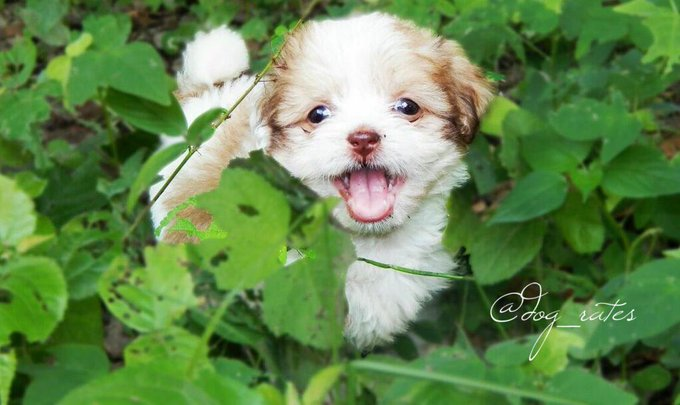 - dog numerator should be 11.27
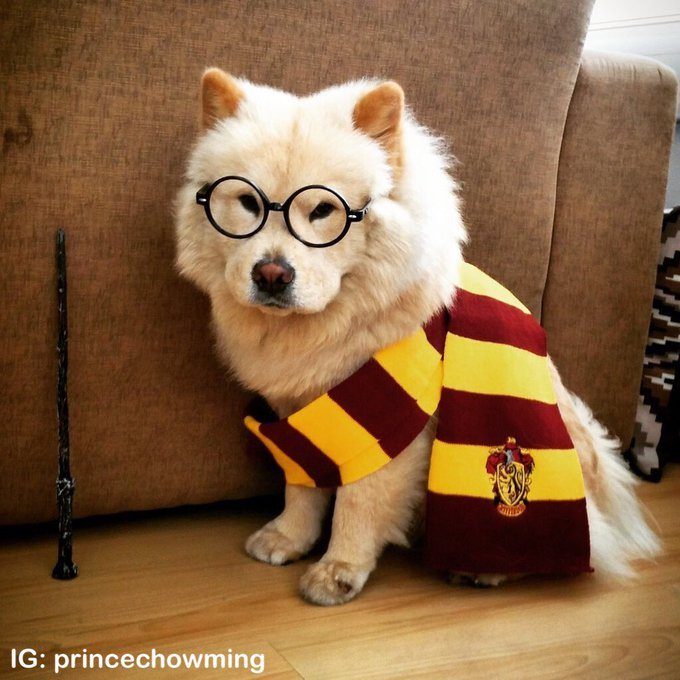 - dog numerator should be 9.75
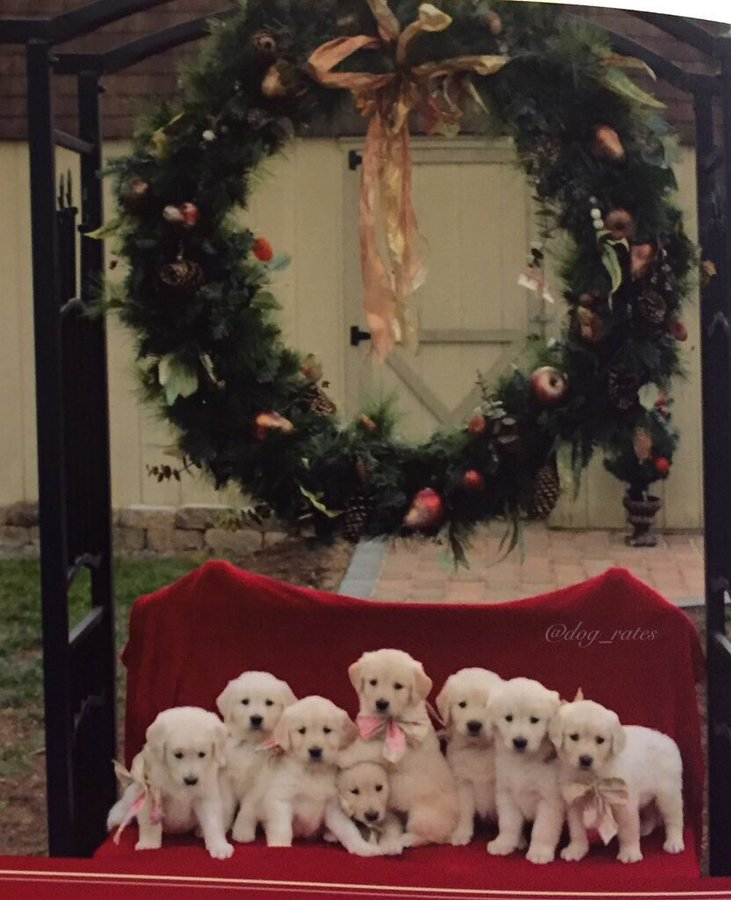 - dog numerator should be 11.26

In [41]:
# Change the ratings using index
twitter_archive_clean.at[763, 'rating_numerator'] = 11.27
twitter_archive_clean.at[695, 'rating_numerator'] = 9.75
twitter_archive_clean.at[315, 'rating_numerator'] = 13
twitter_archive_clean.at[979, 'rating_numerator'] = 13
twitter_archive_clean.at[1712, 'rating_numerator'] = 11.26
twitter_archive_clean.at[2074, 'rating_numerator'] = 13


In [42]:
abnormal_ratings2 = [1, 2, 3, 4]
for rating in abnormal_ratings2:
    print("Tweet with abnormal rating", rating)
    print(twitter_archive_clean[twitter_archive_clean.rating_numerator == rating].text)
    print("\n")
    

Tweet with abnormal rating 1
1869    What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0                   
2091    Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO    
2261    Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx
2338    Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX      
Name: text, dtype: object


Tweet with abnormal rating 2
1761    Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r
1764    This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz
1920    This is Henr

**rating_numerator = 1** They are not dog 
**Delete these indexes**
- 1869, 2091, 2261, 2338
-----------------------------------------------

**rating_numerator = 2** They are not dog 
**Delete these indexes**
- 1761, 1920, 2079, 2237, 2310, 2326, 2349

-----------------------------------------------
**rating_numerator = 3** They are not dog 
**Delete these indexes**
- 765, 1189, 1314, 1406, 1478, 1601, 1692, 1836,1898,1928,1938,1947,2136,2202,2239,2305,2334

-----------------------------------------------
**rating_numerator = 4** They are not dog
**Delete these indexes**
- 883, 912, 1004, 1219, 1303, 1459, 1629, 1701, 1941, 2070, 2076, 2186, 2222, 2288, 2316


In [43]:
indexes_to_delete = [1869, 2091, 2261, 2338, 1761, 1920, 2079, 2237, 2310, 2326, 2349, 765, 1189, 1314, 1406, 1478, 1601, 1692, 1836, 1898, 1928, 1938, 1947, 2136, 2202, 2239, 2305, 2334, 883, 912, 1004, 1219, 1303, 1459, 1629, 1701, 1941, 2070, 2076, 2186, 2222, 2288, 2316
]

# Remove the rows with the specified indexes from the 'twitter_archive_clean' dataset
twitter_archive_clean = twitter_archive_clean.drop(indexes_to_delete)

#### Test

In [44]:
# Count the frequency of each unique value in the 'rating_numerator' column of 'twitter_archive_clean'
twitter_archive_clean.rating_numerator.value_counts()

12    490
10    437
11    415
13    302
9     153
8     98 
7     51 
14    38 
5     34 
6     32 
3     2  
2     2  
Name: rating_numerator, dtype: int64

#### NOTE 
After cleaning it, we reduced the number of unwanted animals from this dataset anyway. We can not delete all of them, it is impossible to read all of the dataset.

### Issue #7:
Remove non-dog entries from `image_prediction`, `twitter_archive`, and `tweet_json` datasets to enhance data quality.


#### Define
Apply the isin and ~ operators to filter and delete rows with False values in the p1_dog, p2_dog, and p3_dog columns in all three datasets.

#### Code

In [45]:
#Display the initial number of rows before data filtering
print("Initial number of rows - image_prediction:", image_prediction_clean.shape)
print("Initial number of rows - twitter_archive:", twitter_archive_clean.shape)
print("Initial number of rows - tweet_json:", tweet_json_clean.shape)

Initial number of rows - image_prediction: (2075, 12)
Initial number of rows - twitter_archive: (2054, 12)
Initial number of rows - tweet_json: (2354, 3)


In [46]:
# Filter posts that are not dogs and put those tweet_id into a drop_list
image_prediction_drop_list = image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Drop the rows with tweet_id in the drop_list in all dataframes
image_prediction_clean = image_prediction_clean[~image_prediction_clean.tweet_id.isin(image_prediction_drop_list)]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(image_prediction_drop_list)]
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(image_prediction_drop_list)]

#### Test

In [47]:
# Display the final number of rows and columns after data filtering
print("Final shape - image_prediction:", image_prediction_clean.shape)
print("Final shape - twitter_archive:", twitter_archive_clean.shape)
print("Final shape - tweet_json:", tweet_json_clean.shape)

Final shape - image_prediction: (1751, 12)
Final shape - twitter_archive: (1783, 12)
Final shape - tweet_json: (2031, 3)


You can see that we droped out approximately 300 entries from each dataset.

### Issue #8:

Retain the most confident prediction for the `image_prediction` table

#### Define 

- Create two new columns: 'breed' and 'conf_level'.

- Implement a function to iterate through the predictions and identify the most confident prediction that represents a dog breed. 

- Prioritize 'p1' as the most confident, followed by 'p2' and 'p3'.

- Remove the unnecessary columns.

#### Code



In [48]:
#Create new columns: 'breed' and 'conf_level'
breed = []
conf_level = []

#Implement a function to identify the most confident prediction that represents a dog breed
#Prioritize 'p1' as the most confident, followed by 'p2' and 'p3'
def get_most_confident_prediction(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf_level.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf_level.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf_level.append(row['p3_conf'])
    else:
        breed.append('Unknown_type')
        conf_level.append(0)

#Apply the function to each row
image_prediction_clean.apply(get_most_confident_prediction, axis=1)

#Add the 'breed' and 'conf_level' columns to image_prediction_clean
image_prediction_clean['breed'] = breed
image_prediction_clean['conf_level'] = conf_level

#Drop the unnecessary columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

#### Test

In [49]:
image_prediction_clean.head()

,tweet_id,jpg_url,breed,conf_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Issue #9:

Inconsistent capitalization in the 'breed' column in table named `image_prediction`



#### Define

Apply the str.capitalize() method to capitalize the first letter of the 'breed' column values.




#### Code

In [50]:
image_prediction_clean['breed'] = image_prediction_clean['breed'].str.capitalize()



#### Test

In [51]:
image_prediction_clean.head(10)


,tweet_id,jpg_url,breed,conf_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden_retriever,0.775930


## Tidiness Issues

We have now 3 tidiness issues

### Issue #1:

Combining doggo, floofer, pupper, and puppo into a single column for dog stage in `twitterr_archive`




#### Define

Combine the individual dog stage columns (doggo, floofer, pupper, puppo) into a single column named "dog_stage". Drop the individual stage columns to eliminate redundancy and improve data organization.



#### Code

In [52]:
# Create a function to extract the dog stage from the individual columns
def extract_dog_stage(row):
    stages = []
    if row['doggo'] != 'None':
        stages.append('doggo')
    if row['floofer'] != 'None':
        stages.append('floofer')
    if row['pupper'] != 'None':
        stages.append('pupper')
    if row['puppo'] != 'None':
        stages.append('puppo')
    
    if len(stages) == 0:
        return 'None'
    elif len(stages) > 1:
        return 'multiple'
    else:
        return stages[0]

# Apply the function to create the "dog_stage" column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.apply(extract_dog_stage, axis=1)

# Drop the individual stage columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# Sort the data by the "dog_stage" column and remove duplicate entries based on the "tweet_id" column
twitter_archive_clean.sort_values('dog_stage', inplace=True)
twitter_archive_clean.drop_duplicates(subset='tweet_id', keep='last', inplace=True)

# Reset the index
twitter_archive_clean.reset_index(drop=True, inplace=True)

#### Test

In [53]:
twitter_archive_clean.dog_stage.value_counts()

None        1493
pupper      186 
doggo       63  
puppo       22  
multiple    10  
floofer     9   
Name: dog_stage, dtype: int64

You can see that we also handled multiple types of dogs

### Issue #2:

Merging Tweet JSON Data with Twitter Archive



#### Define

The data from the "tweet_json" table, specifically the "retweet_count" and "favorite_count" columns, should be merged with the "twitter_archive" table to consolidate relevant information in a single dataset.



#### Code

In [54]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                                on='tweet_id', how='left')

#### Test

In [55]:
twitter_archive_clean.head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,6514,33819
1,690360449368465409,2016-01-22 02:28:52,Twitter iPhone,Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx,https://twitter.com/dog_rates/status/690360449368465409/photo/1,9,10,the,None,1006,2925
2,690374419777196032,2016-01-22 03:24:22,Twitter iPhone,This is Phred. He's an Albanian Flepperkush. Tongue is rather impressive if I'm honest. Perhaps even legendary 11/10 https://t.co/VpfFCKE28C,https://twitter.com/dog_rates/status/690374419777196032/photo/1,11,10,Phred,None,972,3560
3,690400367696297985,2016-01-22 05:07:29,Twitter iPhone,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,https://twitter.com/dog_rates/status/690400367696297985/photo/1,10,10,Eriq,None,509,2041
4,690597161306841088,2016-01-22 18:09:28,Twitter iPhone,This is Lolo. She's America af. Behind in science &amp; math but can say whatever she wants on Twitter. 11/10 ...Merica https://t.co/Nwi3SYe8KA,https://twitter.com/dog_rates/status/690597161306841088/photo/1,11,10,Lolo,None,681,2163


### Issue #3:
`Twitter_Archive` - Merge `Image_Prediction` Data



#### Define

Merge the image_prediction data with the twitter_archive data to include image predictions for tweets. Only keep the rows with valid image predictions, filtering out the null values.

#### Code

In [60]:
# Merge image_prediction with twitter_archive
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean,
                                on='tweet_id', how='left')

# Count the number of null values before cleaning
twitter_archive_clean.jpg_url.isnull().sum()

# Filter out rows with null values in jpg_url column
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()]

#### Test

In [61]:
# Count the number of null values after cleaning
twitter_archive_clean.jpg_url.isnull().sum()

0

<a id="storing-data"></a>
## Storing Data
I Saved gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
# Dataframe
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,conf_level
0,892177421306343426,2017-08-01 00:17:27,Twitter iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
1,690360449368465409,2016-01-22 02:28:52,Twitter iPhone,Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx,https://twitter.com/dog_rates/status/690360449368465409/photo/1,9,10,the,None,1006,2925,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,Pug,0.686933
2,690374419777196032,2016-01-22 03:24:22,Twitter iPhone,This is Phred. He's an Albanian Flepperkush. Tongue is rather impressive if I'm honest. Perhaps even legendary 11/10 https://t.co/VpfFCKE28C,https://twitter.com/dog_rates/status/690374419777196032/photo/1,11,10,Phred,None,972,3560,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,Kuvasz,0.286345
3,690400367696297985,2016-01-22 05:07:29,Twitter iPhone,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,https://twitter.com/dog_rates/status/690400367696297985/photo/1,10,10,Eriq,None,509,2041,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,Pembroke,0.426459
4,690597161306841088,2016-01-22 18:09:28,Twitter iPhone,This is Lolo. She's America af. Behind in science &amp; math but can say whatever she wants on Twitter. 11/10 ...Merica https://t.co/Nwi3SYe8KA,https://twitter.com/dog_rates/status/690597161306841088/photo/1,11,10,Lolo,None,681,2163,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,Lhasa,0.097500


In [65]:
#Display summary information of the twitter_archive_clean DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 1782
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1657 non-null   int64         
 1   timestamp           1657 non-null   datetime64[ns]
 2   source              1657 non-null   object        
 3   text                1657 non-null   object        
 4   expanded_urls       1657 non-null   object        
 5   rating_numerator    1657 non-null   int64         
 6   rating_denominator  1657 non-null   int64         
 7   name                1657 non-null   object        
 8   dog_stage           1657 non-null   object        
 9   retweet_count       1657 non-null   int64         
 10  favorite_count      1657 non-null   int64         
 11  jpg_url             1657 non-null   object        
 12  breed               1657 non-null   object        
 13  conf_level          1657 non-null   float64     

In [71]:
#Save the cleaned dataframe as a CSV file named "twitter_archive_master.csv"
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

#Load the CSV file into a new dataframe
df = pd.read_csv('twitter_archive_master.csv')

<a id="analyzing-and-visualizing-data"></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [73]:
df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,conf_level
0,892177421306343426,2017-08-01 00:17:27,Twitter iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
1,690360449368465409,2016-01-22 02:28:52,Twitter iPhone,Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx,https://twitter.com/dog_rates/status/690360449368465409/photo/1,9,10,the,None,1006,2925,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,Pug,0.686933
2,690374419777196032,2016-01-22 03:24:22,Twitter iPhone,This is Phred. He's an Albanian Flepperkush. Tongue is rather impressive if I'm honest. Perhaps even legendary 11/10 https://t.co/VpfFCKE28C,https://twitter.com/dog_rates/status/690374419777196032/photo/1,11,10,Phred,None,972,3560,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,Kuvasz,0.286345


I want to see columns in order to make questions to get some interesting insights

In [76]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'breed', 'conf_level'],
      dtype='object')

### 1. Distribution of ratings: 
We create a bar plot to visualize the distribution of rating numerators in the dataset.

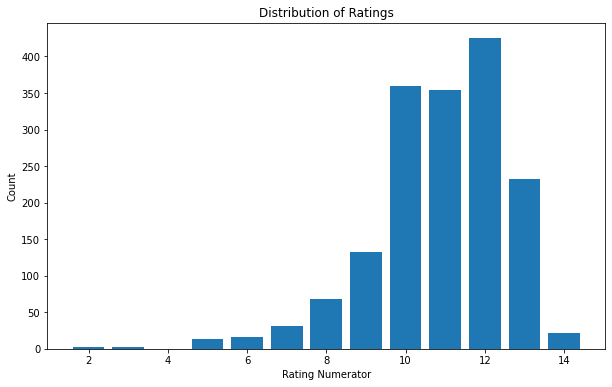

In [77]:
rating_counts = twitter_archive_clean['rating_numerator'].value_counts()
# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating Numerator')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

### 2. Most common dog stages:

We generate a pie chart to show the distribution of different dog stages in the dataset.

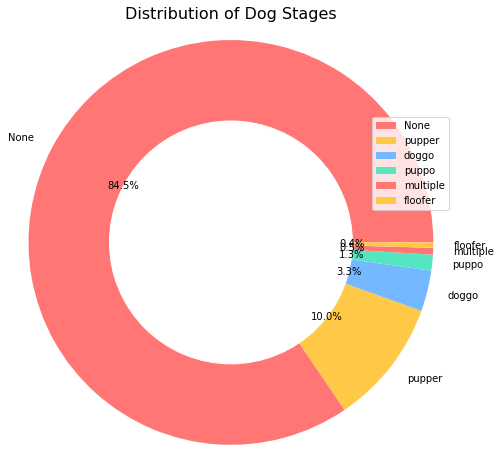

In [89]:
dog_stage_counts = twitter_archive_clean['dog_stage'].value_counts()

# Define color palette
colors = ['#FF7675', '#FFC947', '#74B9FF', '#55E6C1']

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(dog_stage_counts.values, labels=dog_stage_counts.index, autopct='%1.1f%%', colors=colors)

# Add a title and legend
plt.title('Distribution of Dog Stages', fontsize=16)
plt.legend(dog_stage_counts.index, loc='upper right', bbox_to_anchor=(1, 0.8))

# Add a circle at the center to create a donut chart effect
center_circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

### 3. Popular Dog Breeds

We analyze the frequency of different dog breeds in the dataset based on the "breed" column from the image prediction data.
Then we Create a bar plot to visualize the top 10 most popular dog breeds in terms of frequency.

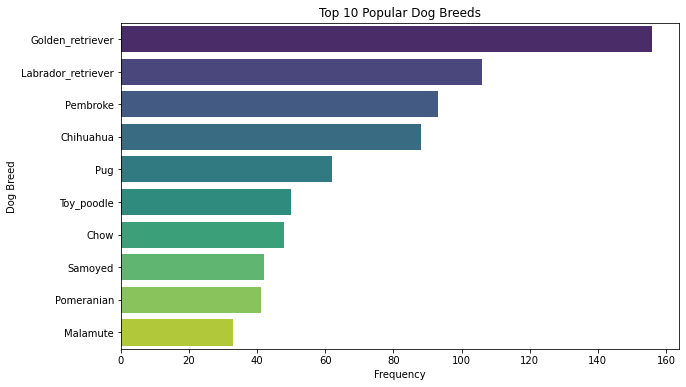

In [82]:
# Calculate the frequency of different dog breeds
breed_counts = df['breed'].value_counts().head(10)

# Create a bar plot to visualize the top 10 most popular dog breeds
plt.figure(figsize=(10, 6))
sns.barplot(x=breed_counts.values, y=breed_counts.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Dog Breed')
plt.title('Top 10 Popular Dog Breeds')
plt.show()

 ### 4. Engagement by Day of the Week

We extract the day of the week from the "timestamp" column to analyze how user engagement (retweets or favorites) varies by different days.
Then, we calculate the average retweet and favorite counts for each day of the week.
Finally, we create a bar plot to show the average engagement for each day of the week.


C:\Users\mehro\AppData\Local\Temp/ipykernel_7968/2122818980.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  engagement_by_day = df.groupby('day_of_week')['retweet_count', 'favorite_count'].mean()


<Figure size 720x432 with 0 Axes>

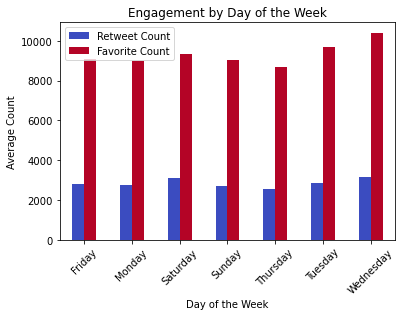

In [84]:
# Extract the day of the week from the timestamp
df['day_of_week'] = pd.to_datetime(df['timestamp']).dt.day_name()

# Calculate the average retweet and favorite counts for each day of the week
engagement_by_day = df.groupby('day_of_week')['retweet_count', 'favorite_count'].mean()

# Create a bar plot to visualize the average engagement for each day of the week
plt.figure(figsize=(10, 6))
engagement_by_day.plot(kind='bar', colormap='coolwarm')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.title('Engagement by Day of the Week')
plt.legend(['Retweet Count', 'Favorite Count'])
plt.xticks(rotation=45)
plt.show()

### 5. Rating Trends Over Time

Firstly, we group the dataset by year or month using the "timestamp" column.
Secondly, we calculate the average rating numerator for each time period.
Finally, we plot a line plot to visualize the trend of ratings over time.

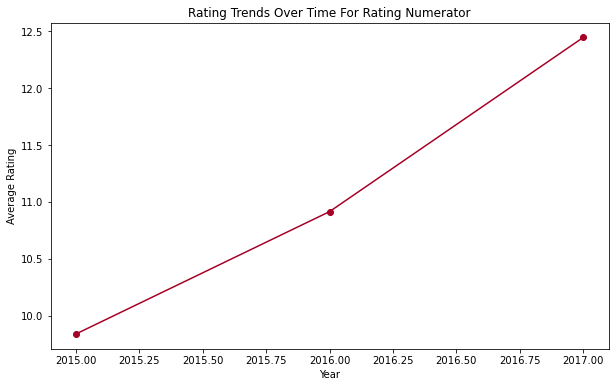

In [88]:
# Extract the year and month from the timestamp
df['year'] = pd.to_datetime(df['timestamp']).dt.year
df['month'] = pd.to_datetime(df['timestamp']).dt.month

# Calculate the average rating numerator for each year or month
rating_trends = df.groupby('year')['rating_numerator'].mean()

# Create a line plot to visualize the trend of ratings over time
plt.figure(figsize=(10, 6))
rating_trends.plot(kind='line', marker='o', colormap='RdYlBu')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Rating Trends Over Time For Rating Numerator')
plt.show()

<a id="insights"></a>
## Insights:
<p>
1. Distribution of ratings: The ratings of the analyzed posts generally follow a normal distribution centered around the rating of 12. The majority of the ratings fall between 10 and 13, with the highest concentration around 12. This suggests that users tend to give relatively high ratings to the posted dogs.
</p>

<p>
2. Distribution of dog stages: Among the specified dog stages, the majority of posts (84.5%) do not specify a particular stage. Among the specified stages, "pupper" is the most common, accounting for 10% of the dog posts. "Doggo" and "puppo" are less common, with frequencies of 3.3% and 1.3%, respectively. Additionally, there are a small number of posts that mention multiple stages or "floofer" stage.
</p>


<p>
3. Popular Dog Breeds: The most popular dog breeds based on the analyzed posts are Golden Retrievers with a frequency of 160, followed by Labrador Retrievers with a frequency of 110. On the other hand, the least popular breed is Malamute, mentioned in only 30 posts. These findings highlight the popularity of certain dog breeds among the users.</p>

<p>
4. Engagement by Day of the Week: When analyzing the engagement metrics (retweet counts and favorite counts) by day of the week, it is observed that posts made on Wednesday tend to receive more favorite counts. Additionally, Saturday, Wednesday, and Friday show higher retweet counts compared to other days. These findings suggest that certain days of the week may generate higher engagement and interaction among users.
</p>
    
<p>
5. Rating Trends Over Time: The average rating for the posted dogs has shown an increasing trend over the years. In 2015, the average rating was 9.8, while in 2017, it increased to 12.4. This indicates that over time, users have been giving higher ratings to the dogs posted on the platform, reflecting a positive sentiment and appreciation for the content.
</p>

<a id="visualization"></a>
## Visualization

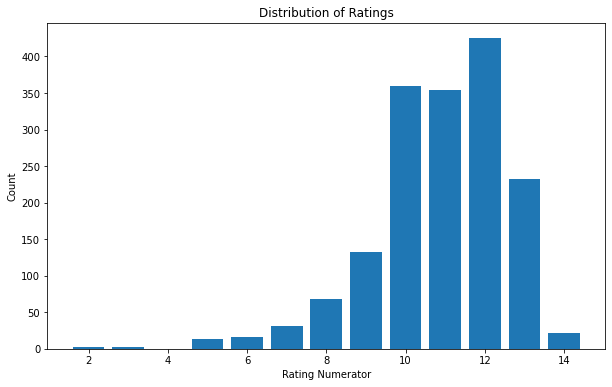

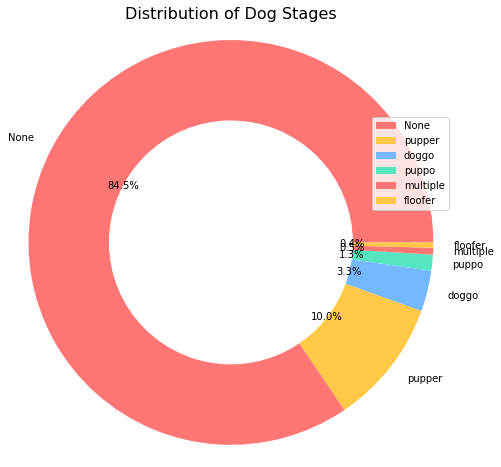

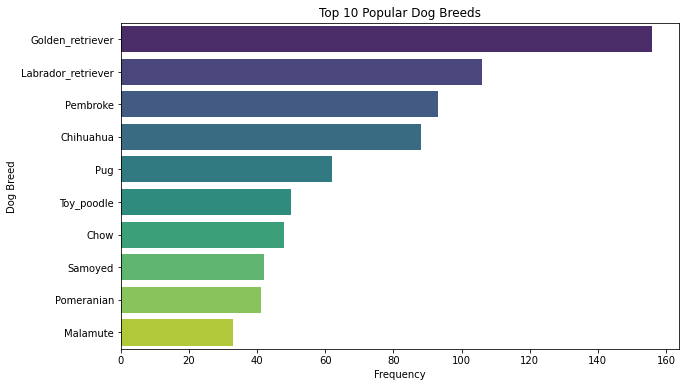

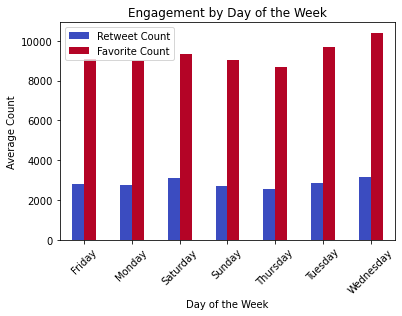

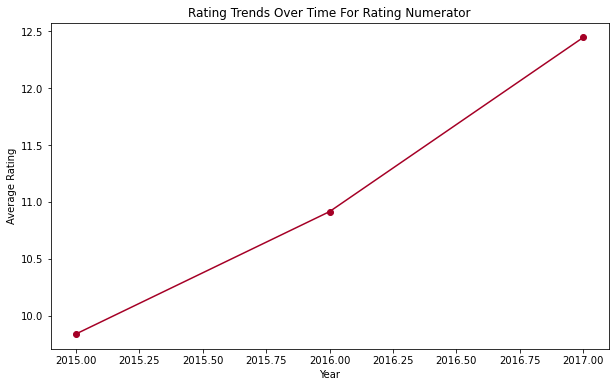